In [1]:
%pip install -r requirements.txt


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv(r"WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075  

In [5]:
df.mean()

fixed acidity             8.311111
volatile acidity          0.531339
citric acid               0.268364
residual sugar            2.532152
chlorides                 0.086933
free sulfur dioxide      15.615486
total sulfur dioxide     45.914698
density                   0.996730
pH                        3.311015
sulphates                 0.657708
alcohol                  10.442111
quality                   5.657043
Id                      804.969379
dtype: float64

In [6]:
df.median()

fixed acidity             7.90000
volatile acidity          0.52000
citric acid               0.25000
residual sugar            2.20000
chlorides                 0.07900
free sulfur dioxide      13.00000
total sulfur dioxide     37.00000
density                   0.99668
pH                        3.31000
sulphates                 0.62000
alcohol                  10.20000
quality                   6.00000
Id                      794.00000
dtype: float64

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
count=df['alcohol'].value_counts()
print(count)

alcohol
9.500000     92
9.400000     72
9.800000     57
9.200000     50
10.000000    49
             ..
11.950000     1
9.950000      1
9.233333      1
9.250000      1
10.550000     1
Name: count, Length: 61, dtype: int64


In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
df.drop('Id',axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [11]:
x1=df['fixed acidity']
x2=df['alcohol']
x3=df['pH']
y=df['quality']
features=list(zip(x1,x2,x3))
print(features)

[(7.4, 9.4, 3.51), (7.8, 9.8, 3.2), (7.8, 9.8, 3.26), (11.2, 9.8, 3.16), (7.4, 9.4, 3.51), (7.4, 9.4, 3.51), (7.9, 9.4, 3.3), (7.3, 10.0, 3.39), (7.8, 9.5, 3.36), (6.7, 9.2, 3.28), (5.6, 9.9, 3.58), (7.8, 9.1, 3.26), (8.5, 10.5, 3.3), (7.9, 9.2, 3.04), (7.6, 9.7, 3.52), (7.9, 9.5, 3.17), (8.5, 9.4, 3.17), (6.9, 9.7, 3.43), (6.3, 9.3, 3.34), (7.6, 9.5, 3.28), (7.1, 9.4, 3.47), (7.8, 9.8, 3.38), (6.7, 10.1, 3.35), (8.3, 9.8, 3.17), (5.2, 9.2, 3.38), (7.8, 9.6, 3.4), (7.8, 10.8, 3.42), (8.1, 9.7, 3.23), (7.3, 10.5, 3.33), (8.8, 9.3, 3.26), (7.5, 10.5, 3.21), (8.1, 10.3, 3.3), (4.6, 13.1, 3.9), (7.7, 9.2, 3.25), (8.8, 9.2, 3.15), (6.6, 9.4, 3.4), (6.6, 9.4, 3.39), (8.6, 9.4, 3.2), (7.6, 10.2, 3.17), (10.2, 9.6, 3.04), (7.8, 10.0, 3.43), (7.3, 9.4, 3.41), (8.8, 9.2, 3.44), (7.7, 9.3, 3.21), (7.0, 9.8, 3.39), (7.2, 10.9, 3.41), (7.2, 10.9, 3.41), (6.6, 10.7, 3.44), (8.0, 10.5, 3.34), (7.7, 9.5, 3.31), (8.3, 9.2, 3.31), (8.8, 10.5, 3.54), (6.8, 10.7, 3.52), (6.7, 10.1, 3.38), (8.3, 9.1, 3.16)

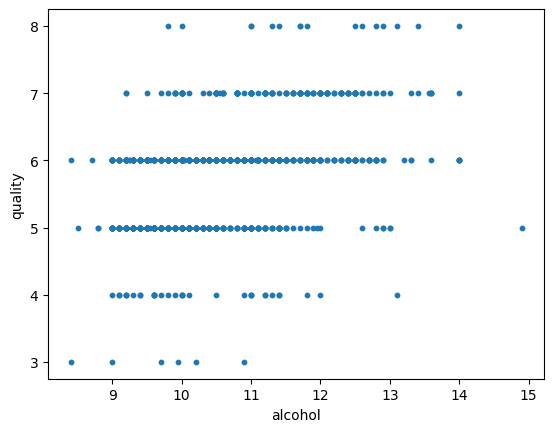

In [12]:
plt.scatter(x2,y,s=10)
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

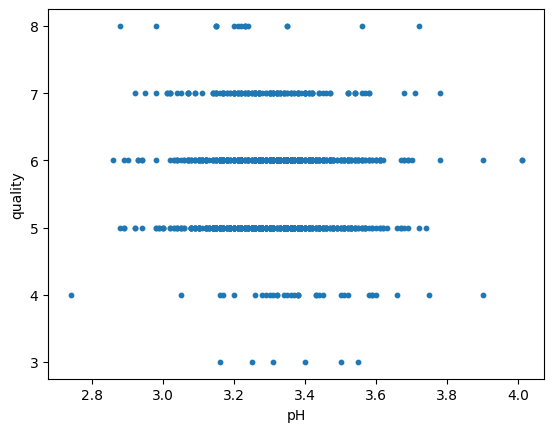

In [13]:
plt.scatter(x3,y,s=10)
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

In [14]:
X_train,X_test,y_train,y_test=train_test_split(features,y,test_size=0.2,random_state=0)
model=KNeighborsClassifier(n_neighbors=30)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [15]:
pred=model.predict(X_test)

In [16]:
accuracy=accuracy_score(y_test,pred)
print(accuracy*100)

63.31877729257642
